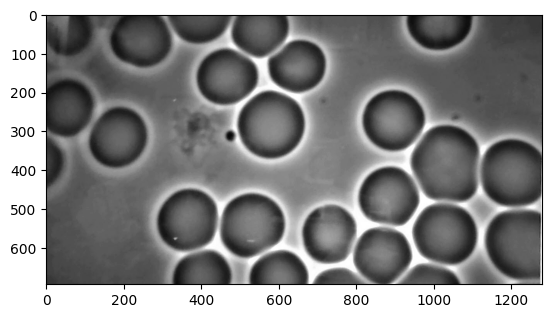

In [29]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

save_results=True
binary_threshold=128
component_limits=(500, 30000)
dilate_iters_number=25


image = cv2.imread("Водораздел пример 1.jpg")
image2 = cv2.imread("Водораздел пример 2.jpg")
temp = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
plt.imshow(temp, cmap = 'gray')


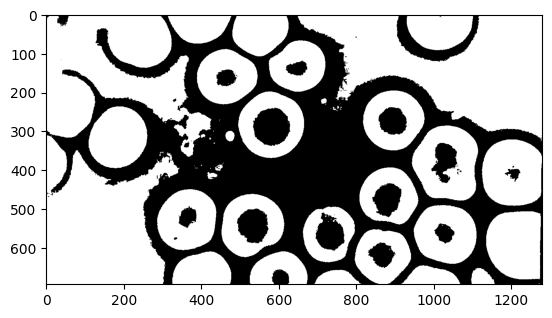

In [30]:
temp = cv2.threshold(temp, binary_threshold, 255, cv2.THRESH_BINARY_INV)[1]
plt.imshow(temp, cmap = 'gray')

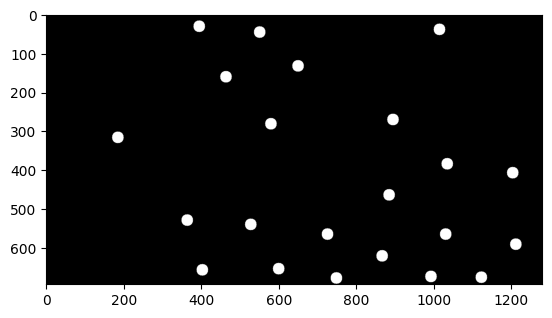

In [31]:
components = cv2.connectedComponentsWithStats(temp, 8, cv2.CV_32S)
foreground = np.zeros_like(image)
for i in range(components[0]):
    area = components[2][i, cv2.CC_STAT_AREA]
    if not (component_limits[0] <= area <= component_limits[1]):
        continue
    cv2.circle(foreground, (int(components[3][i][0]), int(components[3][i][1])), 15, (255, 255, 255), -1)
foreground = foreground[:, :, 0]

plt.imshow(foreground, cmap = 'gray')

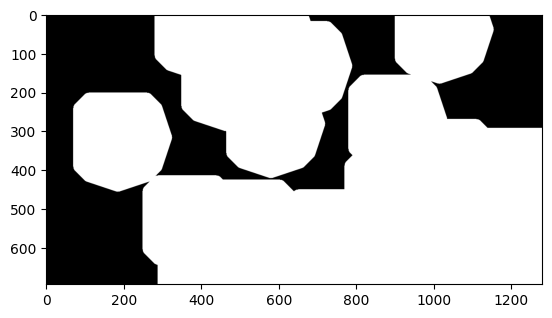

In [32]:
kernel = np.zeros((10, 10), np.uint8)
cv2.circle(kernel, (5, 5), 5, 255, -1)
background = cv2.dilate(foreground, kernel, iterations=dilate_iters_number)
plt.imshow(background, cmap = 'gray')

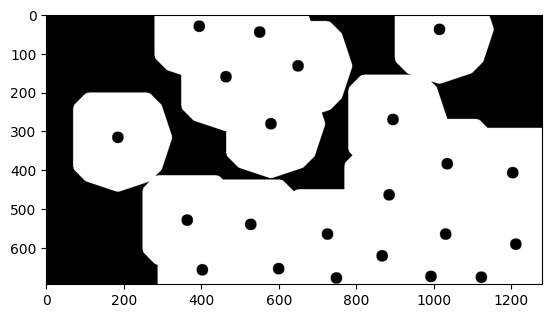

In [33]:
unknown_regions = cv2.subtract(background, foreground)
plt.imshow(unknown_regions, cmap = 'gray')

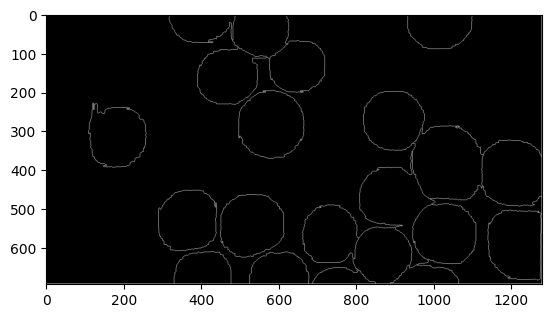

In [34]:
markers = cv2.connectedComponents(np.uint8(foreground))[1]
markers += 10
markers[unknown_regions == 255] = 0
markers = cv2.watershed(image, markers)
segmentation = np.zeros((image.shape[0], image.shape[1]))
segmentation[markers == -1] = 255
plt.imshow(segmentation, cmap = 'gray')


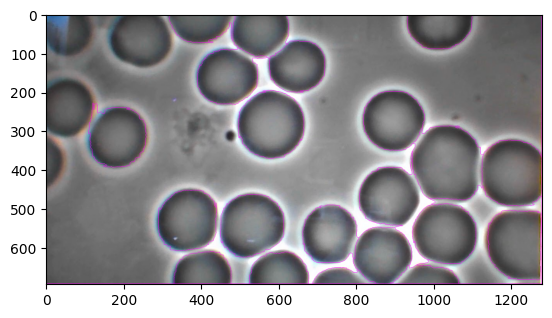

In [35]:
image_copy = image.copy()
image_copy[segmentation == 255] = np.array([255, 0, 255])
plt.imshow(image_copy)